In [1]:
# Hello guys! Lets try making some analysis with this wonderful dataset for Energy Markets.

In [2]:
# Imports

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
from functools import reduce

In [4]:
#Loading and Observing data

In [5]:
df = pd.read_csv("../input/electric-energy-markets-by-country/Electric_energy_markets_by_country.csv")
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     223 non-null    object 
 1   Production  (million kWh)   213 non-null    float64
 2   Rank                        92 non-null     float64
 3   Date                        214 non-null    object 
 4   Consumption  (million kWh)  214 non-null    float64
 5   Exports  (million kWh)      215 non-null    float64
 6   Imports  (million kWh)      214 non-null    float64
dtypes: float64(5), object(2)
memory usage: 12.3+ KB


,Country,Production (million kWh),Rank,Date,Consumption (million kWh),Exports (million kWh),Imports (million kWh)
0,World,18960000.0,NaN,2007 est.,16880000.0,655600.0,627900.0
1,People's Republic of China,6495100.0,34.0,2007 est.,6310000.0,14040.0,4771.0
2,United States,4281800.0,1.0,2007 est.,3911000.0,20140.0,51400.0
3,European Union,3056000.0,NaN,NaN,2858000.0,NaN,NaN
4,Japan,1082000.0,NaN,2007 est.,982500.0,0.0,0.0
5,Russian Federation,964200.0,32.0,2007 est.,819600.0,15810.0,5670.0
6,India,665300.0,40.0,2006 est.,517200.0,378.0,3189.0
7,Canada,612600.0,8.0,2007 est.,530000.0,50120.0,19660.0
8,Germany,594700.0,3.0,2007 est.,549100.0,62510.0,46130.0
9,France,537900.0,17.0,2007 est.,447300.0,67600.0,10780.0


In [6]:
 #Cleaning the data.
# The dataset is prety clear. Even ordered, but we can't be sure.
# 223 countries, and 6 informational columns. 
# Let's remove some of the columns that wont take part in our analysis like 'rank' and 'date' (it is clear that the info is dated around 2007)
# And convert all the NaN to 0

In [7]:
df.fillna(0, inplace=True)
df.head(10)

,Country,Production (million kWh),Rank,Date,Consumption (million kWh),Exports (million kWh),Imports (million kWh)
0,World,18960000.0,0.0,2007 est.,16880000.0,655600.0,627900.0
1,People's Republic of China,6495100.0,34.0,2007 est.,6310000.0,14040.0,4771.0
2,United States,4281800.0,1.0,2007 est.,3911000.0,20140.0,51400.0
3,European Union,3056000.0,0.0,0,2858000.0,0.0,0.0
4,Japan,1082000.0,0.0,2007 est.,982500.0,0.0,0.0
5,Russian Federation,964200.0,32.0,2007 est.,819600.0,15810.0,5670.0
6,India,665300.0,40.0,2006 est.,517200.0,378.0,3189.0
7,Canada,612600.0,8.0,2007 est.,530000.0,50120.0,19660.0
8,Germany,594700.0,3.0,2007 est.,549100.0,62510.0,46130.0
9,France,537900.0,17.0,2007 est.,447300.0,67600.0,10780.0


In [8]:
df = df.drop(['Rank','Date'],axis=1)
df.head(10)

,Country,Production (million kWh),Consumption (million kWh),Exports (million kWh),Imports (million kWh)
0,World,18960000.0,16880000.0,655600.0,627900.0
1,People's Republic of China,6495100.0,6310000.0,14040.0,4771.0
2,United States,4281800.0,3911000.0,20140.0,51400.0
3,European Union,3056000.0,2858000.0,0.0,0.0
4,Japan,1082000.0,982500.0,0.0,0.0
5,Russian Federation,964200.0,819600.0,15810.0,5670.0
6,India,665300.0,517200.0,378.0,3189.0
7,Canada,612600.0,530000.0,50120.0,19660.0
8,Germany,594700.0,549100.0,62510.0,46130.0
9,France,537900.0,447300.0,67600.0,10780.0


In [9]:
#So it seems that the the World and the European Union dont represent single countries. Let's remove them for now for clarity.

In [10]:
df = df.drop([0,3],axis=0)
df.reset_index(drop=True)
df.head(20)


,Country,Production (million kWh),Consumption (million kWh),Exports (million kWh),Imports (million kWh)
1,People's Republic of China,6495100.0,6310000.0,14040.0,4771.0
2,United States,4281800.0,3911000.0,20140.0,51400.0
4,Japan,1082000.0,982500.0,0.0,0.0
5,Russian Federation,964200.0,819600.0,15810.0,5670.0
6,India,665300.0,517200.0,378.0,3189.0
7,Canada,612600.0,530000.0,50120.0,19660.0
8,Germany,594700.0,549100.0,62510.0,46130.0
9,France,537900.0,447300.0,67600.0,10780.0
10,Brazil,437300.0,402200.0,2033.0,40470.0
11,South Korea,412700.0,368600.0,0.0,0.0


In [11]:
# Okay,let's dive into some plotting,analysis and visualisation.
# We can sort the top 20 Energy producers
# And let's rename those colums for shorntess nad clarity.

In [12]:
df.columns = ['Country','Production','Consumption','Exports','Imports']
list(df.columns.values)

['Country', 'Production', 'Consumption', 'Exports', 'Imports']

In [13]:
df_top_producers = df[['Country','Production']]
df_top_producers = df_top_producers.nlargest(20,'Production').reset_index(drop=True)
df_top_producers.head(20)

,Country,Production
0,People's Republic of China,6495100.0
1,United States,4281800.0
2,Japan,1082000.0
3,Russian Federation,964200.0
4,India,665300.0
5,Canada,612600.0
6,Germany,594700.0
7,France,537900.0
8,Brazil,437300.0
9,South Korea,412700.0


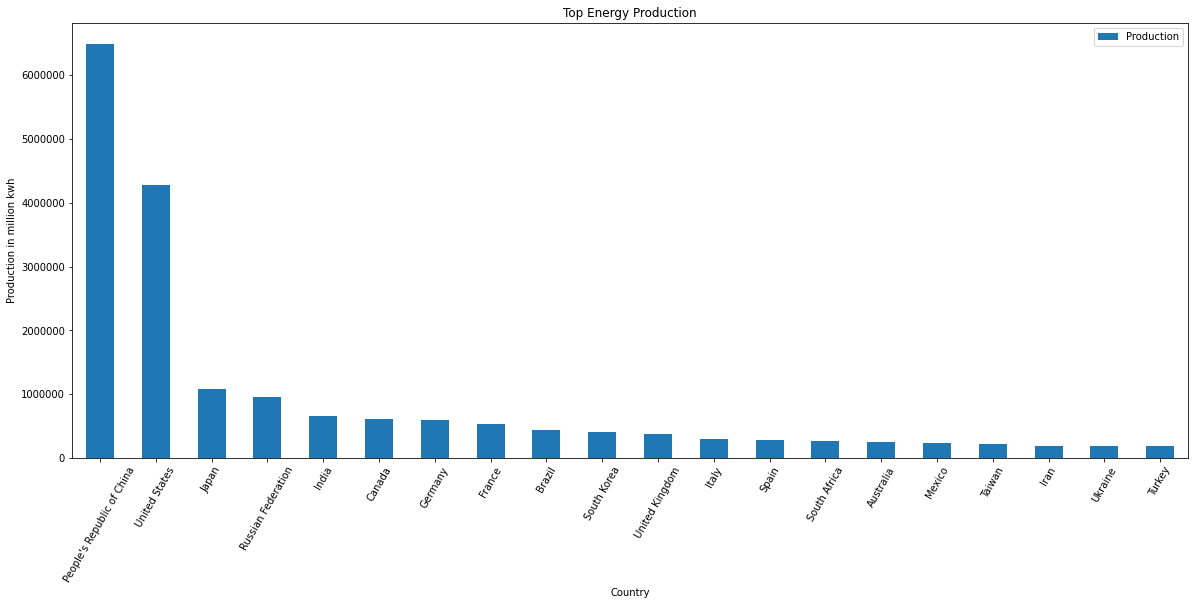

In [14]:
df_top_producers.plot(x='Country', y='Production',kind="bar",figsize=(20, 8))  
plt.xlabel('Country')
plt.xticks(rotation=60)
plt.ylabel('Production in million kwh')
plt.title('Top Energy Production')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [15]:
# Who are the top consumers?

In [16]:
df_top_consumers = df[['Country','Consumption']]
df_top_consumers = df_top_consumers.nlargest(20,'Consumption').reset_index(drop=True)
df_top_consumers


,Country,Consumption
0,People's Republic of China,6310000.0
1,United States,3911000.0
2,Japan,982500.0
3,Russian Federation,819600.0
4,Germany,549100.0
5,Canada,530000.0
6,India,517200.0
7,France,447300.0
8,Brazil,402200.0
9,South Korea,368600.0


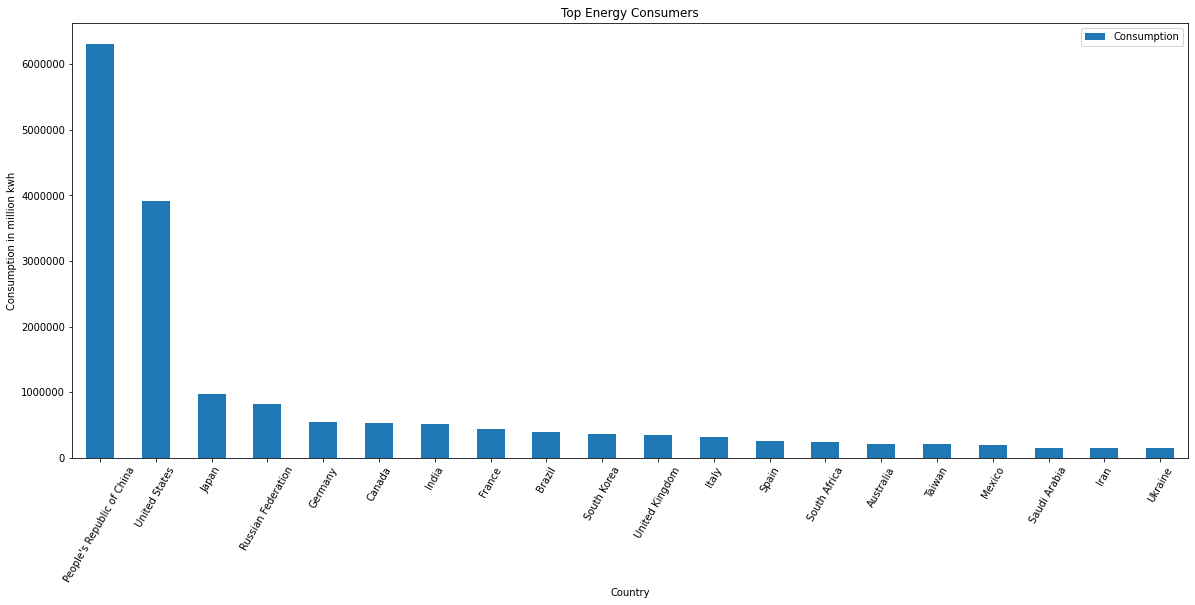

In [17]:
df_top_consumers.plot(x='Country', y='Consumption',kind="bar",figsize=(20, 8))  
plt.xlabel('Country')
plt.xticks(rotation=60)
plt.ylabel('Consumption in million kwh')
plt.title('Top Energy Consumers')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [18]:
# Who are the top Exporters?

In [19]:
df_top_exporters = df[['Country','Exports']]
df_top_exporters = df_top_exporters.nlargest(20,'Exports').reset_index(drop=True)
df_top_exporters

,Country,Exports
0,France,67600.0
1,Paraguay,64000.0
2,Germany,62510.0
3,Canada,50120.0
4,Switzerland,36880.0
5,Czech Republic,26360.0
6,United States,20140.0
7,Russian Federation,15810.0
8,Austria,15510.0
9,Norway,15320.0


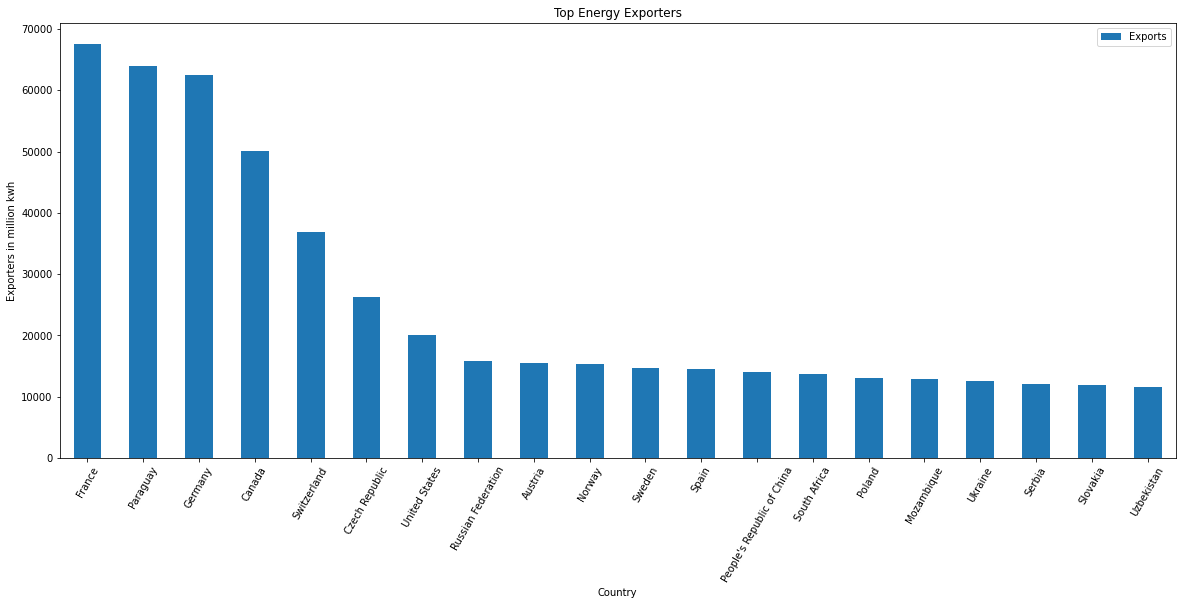

In [20]:
df_top_exporters.plot(x='Country', y='Exports',kind="bar",figsize=(20, 8))  
plt.xlabel('Country')
plt.xticks(rotation=60)
plt.ylabel('Exporters in million kwh')
plt.title('Top Energy Exporters')
plt.show()

In [21]:
#Good guy France :) 
#Let's see who are top impoters

In [22]:
df_top_importers = df[['Country','Imports']]
df_top_importers = df_top_importers.nlargest(20,'Imports').reset_index(drop=True)
df_top_importers

,Country,Imports
0,United States,51400.0
1,Italy,48570.0
2,Germany,46130.0
3,Brazil,40470.0
4,Switzerland,34820.0
5,Netherlands,23140.0
6,Austria,22130.0
7,Canada,19660.0
8,Sweden,16610.0
9,Belgium,15780.0


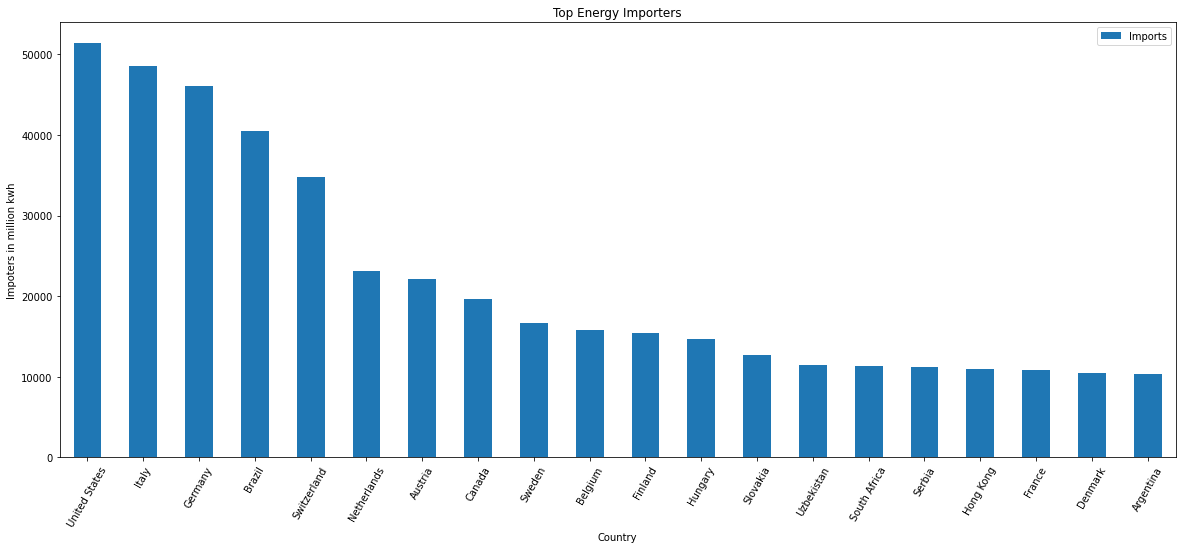

In [23]:
df_top_importers.plot(x='Country', y='Imports',kind="bar",figsize=(20, 8))  
plt.xlabel('Country')
plt.xticks(rotation=60)
plt.ylabel('Impoters in million kwh')
plt.title('Top Energy Importers')
plt.show()

In [24]:
#Greedy United States :P
#So lets do some analysis
# 1.Top energy producer is People's Republic of China
# 2.Top energy consumer is also People's Republic of China
# 3.Top energy Exporter is France
# 4.Top energy Importer is United States

